In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [3]:
from src.data_handler import CoinDataStore

store = CoinDataStore("AVAX")
df_avax = store.load_all()
df_avax

,price,size,time,seller,buyer
0,19.521999,213.199997,2025-03-22 10:50:22.930512310,8,658
1,19.521999,1.000000,2025-03-22 10:50:23.731759790,19,658
2,19.525999,11.820000,2025-03-22 10:50:43.490273671,161,1260
3,19.525999,39.150002,2025-03-22 10:50:43.490273671,161,19500
4,19.525000,8.800000,2025-03-22 10:50:43.490273671,161,240
...,...,...,...,...,...
1478242,24.966999,1.210000,2025-07-27 08:44:33.762000000,8,1527
1478243,24.971001,308.359985,2025-07-27 08:44:59.437000000,161,5135
1478244,24.971001,203.639999,2025-07-27 08:44:59.437000000,892,5135
1478245,24.971001,11.940000,2025-07-27 08:45:07.130000000,19,170117


In [3]:
# Load CSV
df = df_avax.copy()

# Example: take trade amounts
trade_amounts = df['size'].astype(str)  # convert to string

In [4]:
# Extract first non-zero digit from each trade amount
def first_digit(x):
    for c in x:
        if c.isdigit() and c != '0':
            return int(c)
    return None

first_digits = trade_amounts.apply(first_digit)
first_digits = first_digits.dropna()


In [5]:
digit_counts = Counter(first_digits)
total = sum(digit_counts.values())

observed_freq = {d: digit_counts.get(d, 0) / total for d in range(1, 10)}

In [6]:
expected_freq = {d: np.log10(1 + 1/d) for d in range(1, 10)}


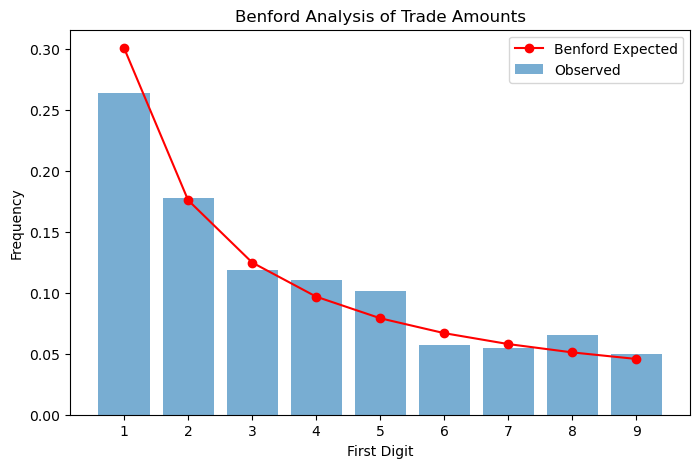

In [7]:
digits = range(1, 10)
obs = [observed_freq[d] for d in digits]
exp = [expected_freq[d] for d in digits]

plt.figure(figsize=(8,5))
plt.bar(digits, obs, alpha=0.6, label='Observed')
plt.plot(digits, exp, 'ro-', label='Benford Expected')
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.title('Benford Analysis of Trade Amounts')
plt.xticks(digits)
plt.legend()
plt.show()


In [8]:
from scipy.stats import chisquare

chi_stat, p_value = chisquare(f_obs=[digit_counts.get(d,0) for d in digits],
                              f_exp=[expected_freq[d]*total for d in digits])

print("Chi-square statistic:", chi_stat)
print("p-value:", p_value)

Chi-square statistic: 27676.281645129886
p-value: 0.0


In [4]:
df_all_matched = df_avax.copy()

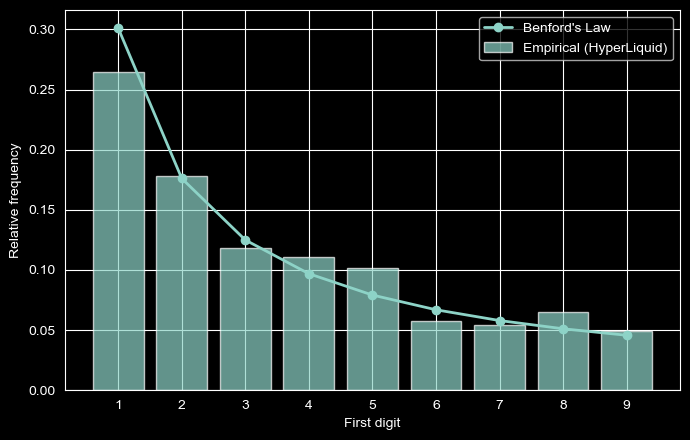

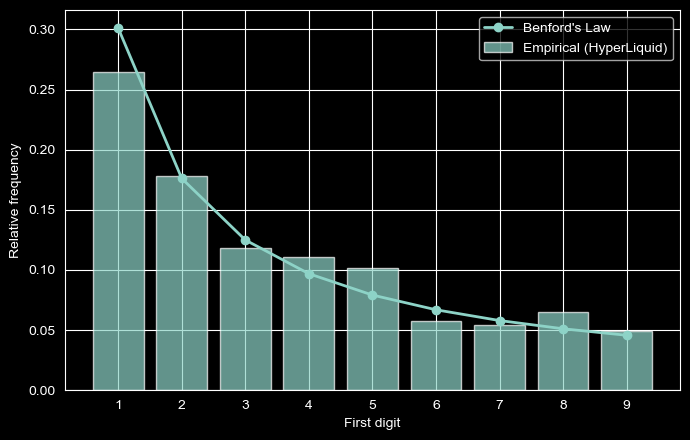

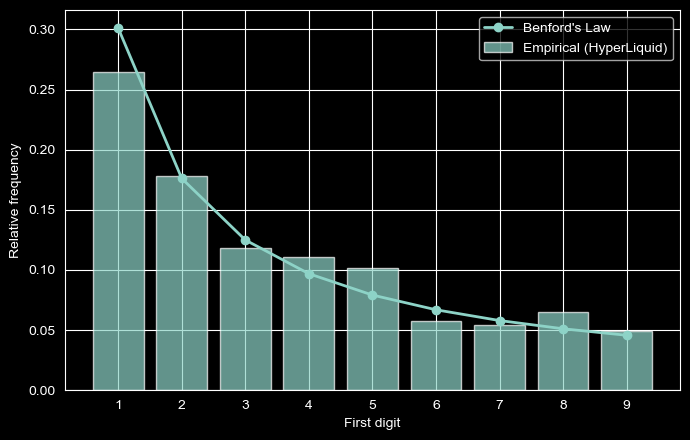

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Select trade size column ---
# change 'size' if your column name differs
x = df_all_matched["size"]

# --- 2. Clean data ---
x = x[(x > 0) & np.isfinite(x)]

# --- 3. Extract first significant digit ---
first_digit = np.floor(
    x / 10 ** np.floor(np.log10(x))
).astype(int)

# Keep only digits 1–9
first_digit = first_digit[(first_digit >= 1) & (first_digit <= 9)]

# --- 4. Empirical frequencies ---
empirical_freq = (
    first_digit
    .value_counts(normalize=True)
    .sort_index()
)

# Ensure all digits appear
digits = np.arange(1, 10)
empirical_freq = empirical_freq.reindex(digits, fill_value=0)

# --- 5. Benford distribution ---
benford_freq = np.log10(1 + 1 / digits)

# --- 6. Plot ---
plt.figure(figsize=(7, 4.5))

plt.bar(
    digits,
    empirical_freq,
    width=0.8,
    alpha=0.7,
    label="Empirical (HyperLiquid)",
)

plt.plot(
    digits,
    benford_freq,
    marker="o",
    linewidth=2,
    label="Benford's Law",
)

plt.xlabel("First digit")
plt.ylabel("Relative frequency")
plt.xticks(digits)
plt.legend()
plt.tight_layout()

plt.show()

ValueError: 
\log_{10}(X) \bmod 1
             ^
ParseFatalException: Unknown symbol: \bmod, found '\'  (at char 13), (line:1, col:14)

<Figure size 700x450 with 1 Axes>

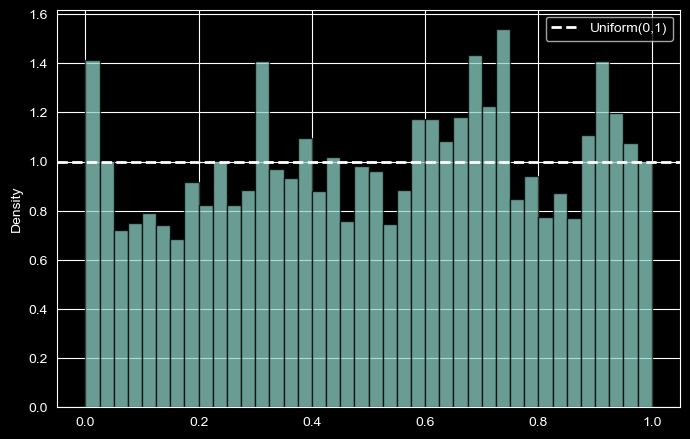

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Select trade size variable ---
# adjust column name if needed
x = df_all_matched["size"]

# --- 2. Clean data ---
x = x[(x > 0) & np.isfinite(x)]

# --- 3. Compute log10(X) mod 1 ---
log_mod1 = np.log10(x) % 1

# --- 4. Plot ---
plt.figure(figsize=(7, 4.5))

plt.hist(
    log_mod1,
    bins=40,
    density=True,
    alpha=0.75,
    edgecolor="black",
)

# Uniform reference line
plt.axhline(
    y=1.0,
    linestyle="--",
    linewidth=2,
    label="Uniform(0,1)",
)

# plt.xlabel(r"$\log_{10}(X) \bmod 1$")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

plt.show()

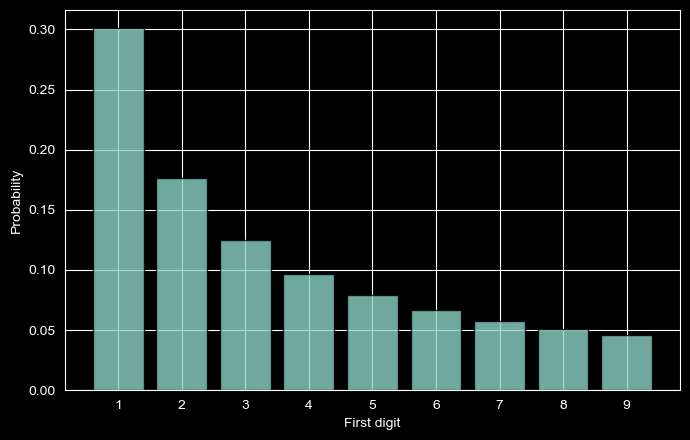

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Digits ---
digits = np.arange(1, 10)

# --- 2. Benford probabilities ---
benford_probs = np.log10(1 + 1 / digits)

# --- 3. Plot ---
plt.figure(figsize=(7, 4.5))

plt.bar(
    digits,
    benford_probs,
    width=0.8,
    edgecolor="black",
    alpha=0.8,
)

plt.xlabel("First digit")
plt.ylabel("Probability")
plt.xticks(digits)
plt.tight_layout()

plt.show()